In [21]:
# Here, I have tried to visualize the data in an example of timeseries i.e, adjusting the visualization in fixed interval of
# time. Tieseries helps us to understand the pattern, trend, seasonality etc about the data. Lets execute a small example.
# Here I will plot Observed vs Predicted deaths of the country (Overall)

# About Dataset: Dataset contains data of 185 countries with 8 columns Viz, Date, Country/Region, Province/State, Lat and Long,
# Confirmed, Recovered and Deaths

In [22]:
import pandas as pd
import numpy as np

In [27]:
# Load the data
df =pd.read_csv("d:/covid_19_time_series.csv")
df.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [28]:
df.isnull().sum() # Checking null values

Date                  0
Country/Region        0
Province/State    16198
Lat                   0
Long                  0
Confirmed            89
Recovered          1246
Deaths               89
dtype: int64

In [29]:
df.shape

(23496, 8)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23496 entries, 0 to 23495
Data columns (total 8 columns):
Date              23496 non-null object
Country/Region    23496 non-null object
Province/State    7298 non-null object
Lat               23496 non-null float64
Long              23496 non-null float64
Confirmed         23407 non-null float64
Recovered         22250 non-null float64
Deaths            23407 non-null float64
dtypes: float64(5), object(3)
memory usage: 1.4+ MB


In [31]:
# We see NaN values in Province/State, lets handle it
df['Province/State'] = df['Province/State'].fillna('NA')
df[df['Province/State']=='NA'].head(1)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NA,33.0,65.0,0.0,0.0,0.0


In [32]:
df['Confirmed'] = df['Confirmed'].fillna(0.0) #fill NA with 0
df['Confirmed'].isnull().sum()

0

In [33]:
df['Recovered'] = df['Recovered'].fillna(0.0) #fill NA with 0
df['Recovered'].isnull().sum()

0

In [34]:
df['Deaths'] = df['Deaths'].fillna(0.0) #fill NA with 0
df['Deaths'].isnull().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23496 entries, 0 to 23495
Data columns (total 8 columns):
Date              23496 non-null object
Country/Region    23496 non-null object
Province/State    23496 non-null object
Lat               23496 non-null float64
Long              23496 non-null float64
Confirmed         23496 non-null float64
Recovered         23496 non-null float64
Deaths            23496 non-null float64
dtypes: float64(5), object(3)
memory usage: 1.4+ MB


In [36]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [37]:
df.head(2)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Month,Day
0,2020-01-22,Afghanistan,NA,33.0,65.0,0.0,0.0,0.0,1,22
1,2020-01-23,Afghanistan,NA,33.0,65.0,0.0,0.0,0.0,1,23


In [38]:
import matplotlib.pyplot as plt

In [39]:
df.groupby('Date')['Deaths'].sum()

Date
2020-01-22        17.0
2020-01-23        18.0
2020-01-24        26.0
2020-01-25        42.0
2020-01-26        56.0
                ...   
2020-04-15    134176.0
2020-04-16    143800.0
2020-04-17    153821.0
2020-04-18    159509.0
2020-04-19    165043.0
Name: Deaths, Length: 89, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23496 entries, 0 to 23495
Data columns (total 10 columns):
Date              23496 non-null object
Country/Region    23496 non-null object
Province/State    23496 non-null object
Lat               23496 non-null float64
Long              23496 non-null float64
Confirmed         23496 non-null float64
Recovered         23496 non-null float64
Deaths            23496 non-null float64
Month             23496 non-null int64
Day               23496 non-null int64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.8+ MB


In [41]:
df.head(2)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Month,Day
0,2020-01-22,Afghanistan,NA,33.0,65.0,0.0,0.0,0.0,1,22
1,2020-01-23,Afghanistan,NA,33.0,65.0,0.0,0.0,0.0,1,23


In [42]:
df['Date'].describe() 

count          23496
unique            89
top       2020-02-11
freq             264
Name: Date, dtype: object

In [43]:
df['Month'].unique()

array([1, 2, 3, 4], dtype=int64)

In [52]:
# Plot country wise Month wise DAILY data (here DAILY data is or MONTH is the repeated interval)
def plotdaily(month,country):
    dff = df[(df['Month']==month) & (df['Country/Region']==country)]
    sr = dff.groupby('Day')['Confirmed','Recovered','Deaths'].sum()
    x = [str(i) for i in sr.index]
    plt.plot(x,sr['Confirmed'], label="Confirmed")
    plt.plot(x,sr['Recovered'],color='g',label='Recovered')
    plt.plot(x,sr['Deaths'],color='r',label='Deaths')
    plt.title("Country wise Month wise DAILY DATA")
    plt.xlabel("Month's Day")
    plt.ylabel("Cases")
    plt.legend()
    plt.show()

In [48]:
from ipywidgets import interact

In [49]:
interact(plotdaily, month=df['Month'].unique(), country=df['Country/Region'].unique())

interactive(children=(Dropdown(description='month', options=(1, 2, 3, 4), value=1), Dropdown(description='coun…

<function __main__.plotdaily(month, country)>

In [53]:
# PLot MONTH wise country wise data
def plotmonthly(country):
    df_mn = df[df['Country/Region']==country]
    sr = df_mn.groupby('Month')['Confirmed','Recovered','Deaths'].sum()
    x = [str(i) for i in sr.index]
    plt.plot(x,sr['Confirmed'], label="Confirmed")
    plt.plot(x,sr['Recovered'],color='g',label='Recovered')
    plt.plot(x,sr['Deaths'],color='r',label='Deaths')
    plt.title("Country wise Month wise DATA")
    plt.xlabel("Month")
    plt.ylabel("Cases")
    plt.legend()
    plt.show()

In [54]:
interact(plotmonthly, country=df['Country/Region'].unique())

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

<function __main__.plotmonthly(country)>

In [58]:
# Lets plot entire data date wise with observed data vs predicted data
df.head(2)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Month,Day
0,20200122,Afghanistan,NA,33.0,65.0,0.0,0.0,0.0,1,22
1,20200123,Afghanistan,NA,33.0,65.0,0.0,0.0,0.0,1,23


In [59]:
data = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23496 entries, 0 to 23495
Data columns (total 10 columns):
Date              23496 non-null object
Country/Region    23496 non-null object
Province/State    23496 non-null object
Lat               23496 non-null float64
Long              23496 non-null float64
Confirmed         23496 non-null float64
Recovered         23496 non-null float64
Deaths            23496 non-null float64
Month             23496 non-null int64
Day               23496 non-null int64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.8+ MB


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].apply(lambda x: x.strftime('%Y%m%d'))

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23496 entries, 0 to 23495
Data columns (total 10 columns):
Date              23496 non-null object
Country/Region    23496 non-null object
Province/State    23496 non-null object
Lat               23496 non-null float64
Long              23496 non-null float64
Confirmed         23496 non-null float64
Recovered         23496 non-null float64
Deaths            23496 non-null float64
Month             23496 non-null int64
Day               23496 non-null int64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.8+ MB


In [63]:
le=LabelEncoder()

In [64]:
data['Country/Region'] =le.fit_transform(data['Country/Region'])
data['Province/State'] =le.fit_transform(data['Province/State'])

In [65]:
data = data.drop(['Day','Month'], axis=1)
data.head(2)

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,20200122,0,46,33.0,65.0,0.0,0.0,0.0
1,20200123,0,46,33.0,65.0,0.0,0.0,0.0


In [66]:
dfi=data.iloc[:,:-1]
dfo=data['Deaths']

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lr= LinearRegression()
lr.fit(dfi,dfo)
lr.score(dfi,dfo)

0.773809618012326

In [69]:
data['Pred_lr'] = lr.predict(dfi)
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths,Pred_lr
0,20200122,0,46,33.0,65.0,0.0,0.0,0.0,-28.812265
1,20200123,0,46,33.0,65.0,0.0,0.0,0.0,-28.747659
2,20200124,0,46,33.0,65.0,0.0,0.0,0.0,-28.683054
3,20200125,0,46,33.0,65.0,0.0,0.0,0.0,-28.618448
4,20200126,0,46,33.0,65.0,0.0,0.0,0.0,-28.553842


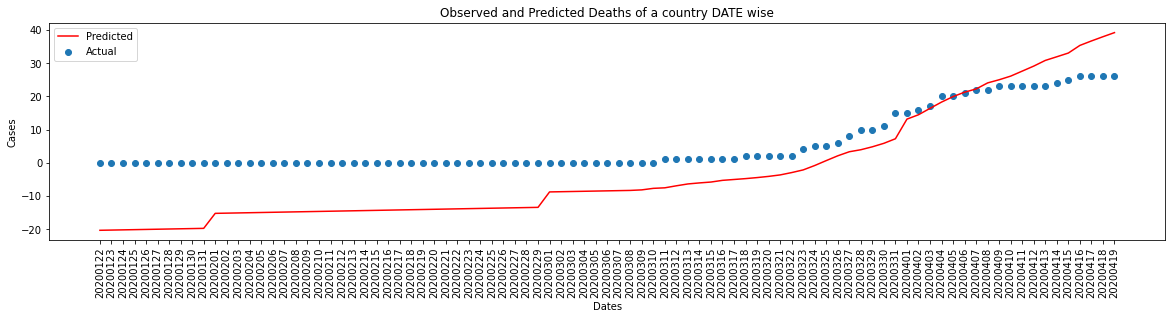

In [71]:
# Test Plot: for a country, date wise deaths, observed and predicted
dfc = data[data['Country/Region']==1]
plt.scatter(dfc['Date'],dfc['Deaths'], label='Actual')
plt.plot(dfc['Date'],dfc['Pred_lr'],color='r', label='Predicted')
plt.title("Observed and Predicted Deaths of a country DATE wise")
plt.xlabel("Dates")
plt.ylabel("Cases")
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'][0]=20
plt.legend()
plt.show()

In [ ]:
# Likewise we can plot data for each country on DAY wise, Month wise i.e, repeated and fixed time interval: